In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
import pytz

from astroplan.plots import plot_sky, plot_airmass
from astroplan import Observer, FixedTarget, time_grid_from_range, observability_table, moon_illumination
from astroplan import AirmassConstraint, MoonSeparationConstraint

In [2]:
lowell = Observer(longitude = 111.6644444 * u.deg,
                    latitude =  35.2027778 * u.deg,
                    elevation = 2210 * u.m,
                    timezone = 'US/Arizona',
                    name = "Lowell Observatory"
                    )
lowell_timezone = lowell.timezone
#doing two times, start at the first day then compare the diffrence
observational_window = Time("2018-12-01 12:00:00")

observational_window2 = Time("2018-12-14 12:00:00")# since 15th is and end, this start will be on 14th

beginning_lowell = observational_window.to_datetime(lowell_timezone)

beginning_lowell2 = observational_window2.to_datetime(lowell_timezone)

print("The local time at the observational window of December 1st is {0}".format(beginning_lowell))

print("The local time at the observational window of December 15st is {0}".format(beginning_lowell2))

The local time at the observational window of December 1st is 2018-12-01 05:00:00-07:00
The local time at the observational window of December 15st is 2018-12-14 05:00:00-07:00


In [3]:
lowell_end = Time("2018-12-02 12:00:00")

lowell2_end = Time("2018-12-15 12:00:00")

lowell_rise = lowell.twilight_morning_astronomical(observational_window, which='next')

lowell_set = lowell.twilight_evening_astronomical(observational_window, which='nearest')

lowell2_rise = lowell.twilight_morning_astronomical(observational_window2, which='next')

lowell2_set = lowell.twilight_evening_astronomical(observational_window2, which='nearest')

print("Astronomical Evening Twilight starts at {0.iso} UTC".format(lowell_set))

print("Astronomical Morning Twilight starts at {0.iso} UTC".format(lowell_rise))

observing_length = (lowell_rise - lowell_set).to(u.h)

observing_length2 = (lowell2_rise - lowell2_set).to(u.h)

print("You can observe for {0:.1f} at Lowell observatory in December.".format(observing_length))
print("You can observe for {0:.1f} at Lowell observatory in December 15th.".format(observing_length2))

Astronomical Evening Twilight starts at 2018-12-01 10:50:59.721 UTC
Astronomical Morning Twilight starts at 2018-12-01 21:54:00.471 UTC
You can observe for 11.1 h at Lowell observatory in December.
You can observe for 11.2 h at Lowell observatory in December 15th.


In [4]:
#lattitude for moon is 0.81 december 1st and -7.43 at 14th
phase = lowell.moon_phase(observational_window) #phase = 2*pi is Full moon. phase = 0 is New moon
phase2 = lowell.moon_phase(lowell_end)

print('The Moon phase is {0} so it is about Waning.'.format(phase))
print('The Moon phase is {0} so it is about Waning.'.format(phase2))

The Moon phase is 1.9015867927803034 rad so it is about Waning.
The Moon phase is 2.121791205168167 rad so it is about Waning.


In [17]:
target_table = pd.read_csv('./datastar1.csv - datastar1.csv.csv')

target_values = target_table.as_matrix()

targets = [FixedTarget(coord=SkyCoord(ra = RA
                                      *u.hourangle, dec = DEC*u.deg), name=Name)
           for Name, RA, DEC in target_values]

In [18]:
window_range = [observational_window, lowell_end]

window_range2 = [observational_window2, lowell2_end]

window_time_grid = time_grid_from_range(window_range)

window_time_grid2 = time_grid_from_range(window_range2)

#targets

#To find the moon seperation, I figured that the objects are so close it doesn't matter, 
#took the average of the dec, and subtracted that by 0.81 for 1st and -7.43 for 15th
#dec average for 1st day is 0.792464. This method will not work.
#Decided to assume that since our data is so far from 0.81 dec that the moon is too far away to affect them.

constraints = [AirmassConstraint(2)]# we are not going above an air mass of two
constraints.append(MoonSeparationConstraint(53*u.deg))#need to change this to an actuall, need to make a for loop
#limits of this code, this only observes the moon at the start and end, but not over the course of our 15 days. 
constraints2 = [AirmassConstraint(2)]
constraints2.append(MoonSeparationConstraint(12*u.deg))

observing_range_lowell = [lowell_set, lowell_rise]

observing_range_lowell2 = [lowell2_set, lowell2_rise]

observing_table_lowell = observability_table(constraints, lowell, targets, time_range = observing_range_lowell)

observing_table_lowell2 = observability_table(constraints, lowell, targets, time_range = observing_range_lowell2)

print(observing_table_lowell)
print(observing_table_lowell2)

 target name   ever observable always observable fraction of time observable
-------------- --------------- ----------------- ---------------------------
LBQS 1314-0216           False             False                         0.0
LBQS 1314-0232           False             False                         0.0
LBQS 1317-0018           False             False                         0.0
LBQS 1325+0207           False             False                         0.0
LBQS 1230+1440           False             False                         0.0
LBQS 1230+1052           False             False                         0.0
LBQS 1137-0048           False             False                         0.0
LBQS 1009-0252           False             False                         0.0
LBQS 0301+0015            True             False          0.6086956521739131
LBQS 0252+0136            True             False          0.6521739130434783
LBQS 1443+0013           False             False                         0.0

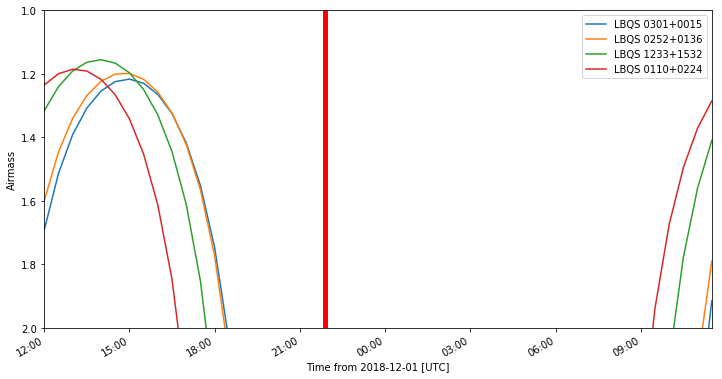

In [19]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)

fig.tight_layout()

for i, my_object in enumerate(targets):#enumerate grab the if statment

    if observing_table_lowell['ever observable'][i]:#ignore object I can't see
        ax = plot_airmass(my_object, lowell, window_time_grid, max_airmass=2.0)

ax.vlines(lowell_rise.datetime, 1,3, color='r', linewidth=5)
ax.vlines(lowell_set.datetime, 1,3, color='b', linewidth=5)

ax.legend();#loc=0,shadow=True);

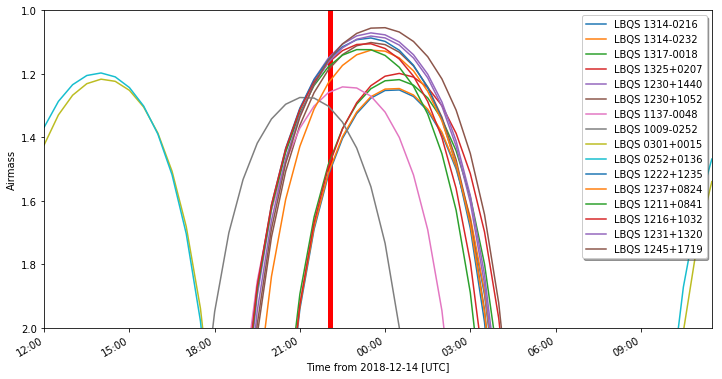

In [20]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)

fig.tight_layout()

for i, my_object in enumerate(targets):#enumerate grab the if statment

    if observing_table_lowell2['ever observable'][i]:#ignore object I can't see
        ax = plot_airmass(my_object, lowell, window_time_grid2, max_airmass=2.0)

ax.vlines(lowell2_rise.datetime, 1,3, color='r', linewidth=5)
ax.vlines(lowell2_set.datetime, 1,3, color='b', linewidth=5)

ax.legend(loc=0,shadow=True);

In [21]:
for i, my_object in enumerate(targets):

    if observing_table_lowell['ever observable'][i]:
        name = observing_table_lowell['target name'][i]
        obj_frac = observing_table_lowell['fraction of time observable'][i]
        obj_time = obj_frac * observing_length
        output = "You can observe {0:s} for {1:.2f} at Lowell Observaitory in December 1st.".format(name, obj_time.to(u.h))
        print(output)
print('------------------------------------------------------')
for i, my_object in enumerate(targets):

    if observing_table_lowell2['ever observable'][i]:
        name = observing_table_lowell2['target name'][i]
        obj_frac = observing_table_lowell2['fraction of time observable'][i]
        obj_time = obj_frac * observing_length2
        output = "You can observe {0:s} for {1:.2f} at Lowell Observaitory in December 15th".format(name, obj_time.to(u.h))
        print(output)

You can observe LBQS 0301+0015 for 6.73 h at Lowell Observaitory in December 1st.
You can observe LBQS 0252+0136 for 7.21 h at Lowell Observaitory in December 1st.
You can observe LBQS 1233+1532 for 6.73 h at Lowell Observaitory in December 1st.
You can observe LBQS 0110+0224 for 5.77 h at Lowell Observaitory in December 1st.
------------------------------------------------------
You can observe LBQS 1314-0216 for 0.97 h at Lowell Observaitory in December 15th
You can observe LBQS 1314-0232 for 0.97 h at Lowell Observaitory in December 15th
You can observe LBQS 1317-0018 for 1.46 h at Lowell Observaitory in December 15th
You can observe LBQS 1325+0207 for 0.97 h at Lowell Observaitory in December 15th
You can observe LBQS 1230+1440 for 2.91 h at Lowell Observaitory in December 15th
You can observe LBQS 1230+1052 for 2.43 h at Lowell Observaitory in December 15th
You can observe LBQS 1137-0048 for 2.91 h at Lowell Observaitory in December 15th
You can observe LBQS 1009-0252 for 3.89 h a